In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('swadesh')
from nltk import FreqDist
from nltk.corpus import swadesh
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package swadesh to C:\Users\Immanuel
[nltk_data]     Ruraya\AppData\Roaming\nltk_data...
[nltk_data]   Package swadesh is already up-to-date!


In [61]:
# function to scrape Swahili text from a website
def scrape_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = ""
    for p in soup.find_all('p'):
        text += p.text.strip() + "\n"
    return text

In [62]:
# Collection of large corpus of Swahili text by scraping multiple websites
def collect_corpus(urls):
    corpus = ""
    for url in urls:
        text = scrape_website(url)
        corpus += text
    return corpus

In [63]:
# URLs to scrape Swahili text from
urls = ['https://www.bbc.com/swahili', 'https://sw.wikipedia.org/wiki/Mwanzo', 'https://www.standardmedia.co.ke/topic/swahili']

In [64]:
# Collecting large corpus of Swahili text by scraping the websites
corpus = collect_corpus(urls)

In [65]:
# Saveing the corpus to a file
with open('swahili_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(corpus)

In [66]:
# Loading the corpus from file
with open('swahili_corpus.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()

In [67]:
# Cleaning and preprocessing the text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    return words

In [68]:
# Cleaning and Preprocessing the corpus
corpus_words = clean_text(corpus)

# Print the first 150 words in the preprocessed corpus (can bem more)
print(corpus_words[:150])

['watu', 'kadhaa', 'wameuawa', 'kwa', 'kupigwa', 'risasi', 'kwenye', 'jumba', 'la', 'mikutano', 'la', 'jehovah', 'witness', 'mjini', 'hamburg', 'kaskazini', 'mwa', 'ujerumani', 'wakati', 'urusi', 'ilivamia', 'ukraine', 'mwaka', 'mmoja', 'uliopita', 'mojawapo', 'ya', 'mafanikio', 'yao', 'makubwa', 'ya', 'awali', 'ilikuwa', 'kusini', 'mwa', 'ukraine', 'baadhi', 'ya', 'nchi', 'zina', 'wasiwasi', 'kuhusu', 'kupungua', 'kwa', 'idadi', 'ya', 'watu', 'na', 'kupungua', 'kwa', 'viwango', 'vya', 'uzazi', 'mwezi', 'uliopita', 'kundi', 'la', 'wanaume', 'katika', 'jimbo', 'la', 'kusini', 'mwa', 'india', 'la', 'karnataka', 'walitembea', 'kilomita', '120', 'kufikia', 'hekalu', 'ili', 'waweze', 'kuomba', 'mungu', 'wapate', 'wake', 'wa', 'kuoa', 'tausi', 'mwenye', 'umri', 'wa', 'miaka', '29', 'anasema', 'kinachomuuma', 'zaidi', 'ni', 'mtoto', 'wake', 'wa', 'kike', 'wa', 'miaka', 'mitatu', 'ambaye', 'amekuwa', 'akitaniwa', 'kutokana', 'na', 'muonekano', 'wa', 'mama', 'yake', 'wanawake', 'hivi', 'karibun

In [69]:
# Load Swahili corpus
swahili_corpus = swadesh.words('sw')

In [70]:
# Compute word frequency distribution
freq_dist = FreqDist(swahili_corpus)

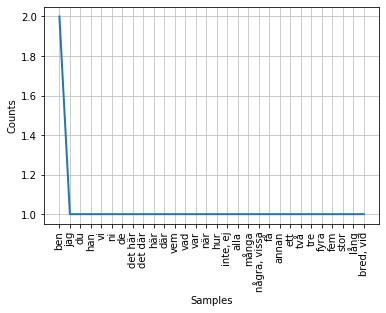

In [71]:
# Plot word frequency distribution
freq_dist.plot(30, cumulative=False)

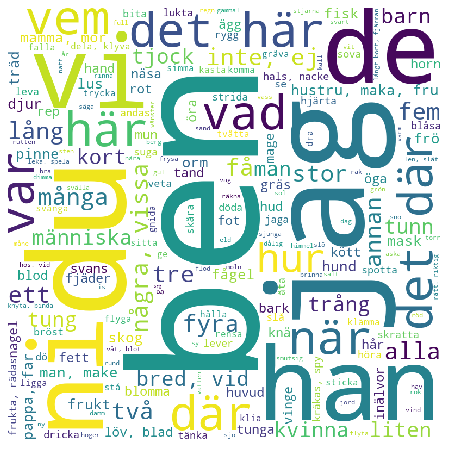

In [72]:
# Generate of word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

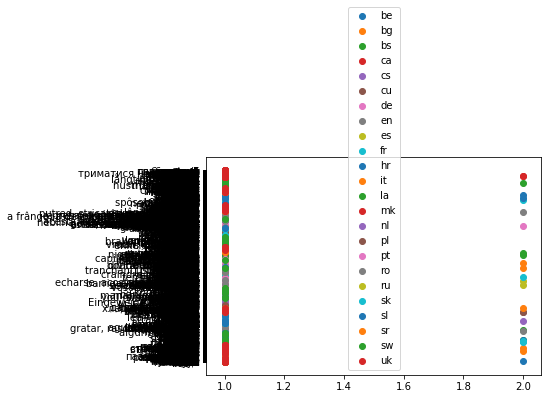

In [73]:
# Scatter plot of word frequency by source
sources = swadesh.fileids()
for source in sources:
    swahili_words = swadesh.words(source)
    freq_dist = FreqDist(swahili_words)
    x = [freq_dist[word] for word in freq_dist.keys()]
    y = [word for word in freq_dist.keys()]
    plt.scatter(x, y, label=source)
plt.legend()
plt.show()